In [1]:
import torch
from math import pi,sqrt,log,e,exp
from time import time
from matplotlib import pyplot
import numpy as np
from matplotlib import pyplot as plt
from tqdm.autonotebook import tqdm
#torch.set_default_dtype(torch.float64)
device = torch.device("cuda:6")

In [2]:
from src.models.flows.coupling_cells.real_nvp import RealNVP
from src.models.flows.sampling import FactorizedGaussianSampler, UniformSampler
from src.models.flows.analytic_flows.element_wise import InvertibleAnalyticSigmoid
from src.models.flows.sequential import InvertibleSequentialFlow
from src.training.weighted_dataset.dkl_training import BasicStatefulDKLTrainer
from src import setup_std_stream_logger
from src.integration.dkltrainer_integrator import DKLAdaptiveSurveyIntegrator

In [3]:
setup_std_stream_logger(debug=True)

In [4]:
def f(x):
    return torch.exp(-10*(2*x[:,1]-torch.cos(4*pi*x[:,0])-1)**2)

In [5]:
posterior=UniformSampler(d=2,low=0.,high=1.,device=device)
prior=FactorizedGaussianSampler(d=2,device=device)

In [6]:
try:
    del model
except:
    pass


model  = InvertibleSequentialFlow(2,[
        RealNVP(d=2,
              mask=[True,False],
              d_hidden=256,
              n_hidden=16,).to(device),
        RealNVP(d=2,
              mask=[False,True],
              d_hidden=256,
              n_hidden=16,).to(device),
        RealNVP(d=2,
              mask=[True,False],
              d_hidden=256,
              n_hidden=16,).to(device),
        RealNVP(d=2,
              mask=[False,True],
              d_hidden=256,
              n_hidden=16,).to(device), 
    InvertibleAnalyticSigmoid(d=2),
])

optim = torch.optim.Adam(model.parameters(),lr=1.e-4)

In [7]:
rm test_checkpoint.h5

In [8]:
try:
    del trainer
except:
    pass

In [9]:
trainer = BasicStatefulDKLTrainer(flow=model,latent_prior=prior,checkpoint="test_checkpoint.h5",max_reloads=5)

In [10]:
trainer.set_config(n_epochs=30, minibatch_size=20000, optim=optim)

In [11]:
try:
    del integrator
except:
    pass

In [12]:
integrator=DKLAdaptiveSurveyIntegrator(f,trainer,2,device=device,trainer_verbosity=3)

In [13]:
trainer.config

{'n_epochs': 30,
 'minibatch_size': 20000,
 'optim': Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     eps: 1e-08
     lr: 0.0001
     weight_decay: 0
 )}

In [14]:
result=integrator.integrate(10,10)

Starting integration
Initializing the survey phase
Starting the survey phase
Training on batch: 100000 points
Epoch 1/30
Loss: 2.541e-01
Loss: 2.446e-01
Loss: 2.447e-01
Loss: 2.414e-01
Loss: 2.312e-01
Epoch 2/30
Loss: 2.121e-01
Loss: 2.036e-01
Loss: 2.042e-01
Loss: 2.013e-01
Loss: 1.920e-01
Epoch 3/30
Loss: 1.751e-01
Loss: 1.672e-01
Loss: 1.680e-01
Loss: 1.651e-01
Loss: 1.566e-01
Epoch 4/30
Loss: 1.416e-01
Loss: 1.343e-01
Loss: 1.353e-01
Loss: 1.325e-01
Loss: 1.248e-01
Epoch 5/30
Loss: 1.117e-01
Loss: 1.048e-01
Loss: 1.057e-01
Loss: 1.028e-01
Loss: 9.564e-02
Epoch 6/30
Loss: 8.411e-02
Loss: 7.751e-02
Loss: 7.836e-02
Loss: 7.526e-02
Loss: 6.860e-02
Epoch 7/30
Loss: 5.873e-02
Loss: 5.249e-02
Loss: 5.322e-02
Loss: 4.997e-02
Loss: 4.388e-02
Epoch 8/30
Loss: 3.568e-02
Loss: 2.983e-02
Loss: 3.032e-02
Loss: 2.679e-02
Loss: 2.123e-02
Epoch 9/30
Loss: 1.497e-02
Loss: 9.631e-03
Loss: 9.827e-03
Loss: 6.250e-03
Loss: 1.636e-03
Epoch 10/30
Loss: -1.516e-03
Loss: -5.000e-03
Loss: -4.206e-03
Loss: -5

Loss: -1.707e-01
Loss: -1.750e-01
Loss: -1.435e-01
Epoch 24/30
Loss: -1.756e-01
Loss: -1.774e-01
Loss: -1.732e-01
Loss: -1.779e-01
Loss: -1.519e-01
Epoch 25/30
Loss: -1.795e-01
Loss: -1.815e-01
Loss: -1.778e-01
Loss: -1.817e-01
Loss: -1.607e-01
Epoch 26/30
Loss: -1.820e-01
Loss: -1.835e-01
Loss: -1.806e-01
Loss: -1.834e-01
Loss: -1.667e-01
Epoch 27/30
Loss: -1.842e-01
Loss: -1.855e-01
Loss: -1.827e-01
Loss: -1.852e-01
Loss: -1.712e-01
Epoch 28/30
Loss: -1.857e-01
Loss: -1.858e-01
Loss: -1.836e-01
Loss: -1.855e-01
Loss: -1.759e-01
Epoch 29/30
Loss: -1.863e-01
Loss: -1.862e-01
Loss: -1.841e-01
Loss: -1.859e-01
Loss: -1.794e-01
Epoch 30/30
Loss: -1.870e-01
Loss: -1.868e-01
Loss: -1.845e-01
Loss: -1.867e-01
Loss: -1.823e-01
Integral: 2.306e-01 +/- 1.534e-03
Training on batch: 100000 points
Epoch 1/30
Loss: -1.940e-01
Loss: -3.232e-03
Loss: -7.685e-02
Loss: -7.223e-02
Loss: -7.221e-02
Epoch 2/30
Loss: -7.416e-02
Loss: -1.792e-01
Loss: -5.591e-02
Loss: -6.317e-02
Loss: -7.144e-02
Epoch 3/30


Loss: -2.106e-01
Loss: -2.149e-01
Loss: -2.161e-01
Loss: -2.139e-01
Epoch 17/30
Loss: -2.168e-01
Loss: -2.097e-01
Loss: -2.146e-01
Loss: -2.151e-01
Loss: -2.131e-01
Epoch 18/30
Loss: -2.166e-01
Loss: -2.110e-01
Loss: -2.149e-01
Loss: -2.163e-01
Loss: -2.133e-01
Epoch 19/30
Loss: -2.165e-01
Loss: -2.084e-01
Loss: -2.137e-01
Loss: -2.140e-01
Loss: -2.120e-01
Epoch 20/30
Loss: -2.161e-01
Loss: -2.103e-01
Loss: -2.143e-01
Loss: -2.161e-01
Loss: -2.138e-01
Epoch 21/30
Loss: -2.161e-01
Loss: -2.097e-01
Loss: -2.146e-01
Loss: -2.160e-01
Loss: -2.138e-01
Epoch 22/30
Loss: -2.158e-01
Loss: -2.116e-01
Loss: -2.147e-01
Loss: -2.152e-01
Loss: -2.130e-01
Epoch 23/30
Loss: -2.171e-01
Loss: -2.103e-01
Loss: -2.142e-01
Loss: -2.159e-01
Loss: -2.138e-01
Epoch 24/30
Loss: -2.161e-01
Loss: -2.133e-01
Loss: -2.148e-01
Loss: -2.159e-01
Loss: -2.148e-01
Epoch 25/30
Loss: -2.161e-01
Loss: -2.119e-01
Loss: -2.152e-01
Loss: -2.165e-01
Loss: -2.148e-01
Epoch 26/30
Loss: -2.169e-01
Loss: -2.121e-01
Loss: -2.145e

Epoch 9/30
Loss: -2.187e-01
Loss: -2.163e-01
Loss: -2.172e-01
Loss: -2.139e-01
Loss: -2.121e-01
Epoch 10/30
Loss: -2.194e-01
Loss: -2.162e-01
Loss: -2.173e-01
Loss: -2.137e-01
Loss: -2.115e-01
Epoch 11/30
Loss: -2.196e-01
Loss: -2.169e-01
Loss: -2.177e-01
Loss: -2.145e-01
Loss: -2.119e-01
Epoch 12/30
Loss: -2.199e-01
Loss: -2.167e-01
Loss: -2.174e-01
Loss: -2.142e-01
Loss: -2.122e-01
Epoch 13/30
Loss: -2.197e-01
Loss: -2.168e-01
Loss: -2.174e-01
Loss: -2.141e-01
Loss: -2.123e-01
Epoch 14/30
Loss: -2.202e-01
Loss: -2.167e-01
Loss: -2.176e-01
Loss: -2.140e-01
Loss: -2.120e-01
Epoch 15/30
Loss: -2.199e-01
Loss: -2.168e-01
Loss: -2.177e-01
Loss: -2.141e-01
Loss: -2.128e-01
Epoch 16/30
Loss: -2.201e-01
Loss: -2.163e-01
Loss: -2.176e-01
Loss: -2.143e-01
Loss: -2.112e-01
Epoch 17/30
Loss: -2.203e-01
Loss: -2.166e-01
Loss: -2.178e-01
Loss: -2.147e-01
Loss: -2.126e-01
Epoch 18/30
Loss: -2.207e-01
Loss: -2.171e-01
Loss: -2.175e-01
Loss: -2.143e-01
Loss: -2.126e-01
Epoch 19/30
Loss: -2.200e-01
Lo

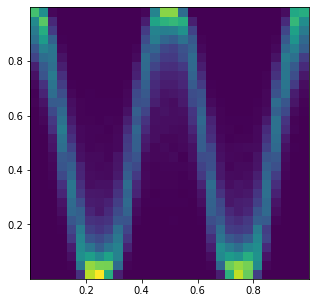

In [15]:
x=trainer.sample_forward(100000).cpu().numpy()
plt.figure(figsize=(5,5))
plt.hist2d(x[:,0],x[:,1],bins=30)
plt.show()

In [16]:
refines = integrator.integration_history.loc[(integrator.integration_history["phase"]=="refine")]

In [17]:
refines["integral"].mean()

0.22933174371719361

In [18]:
np.sqrt((refines["error"]**2 / len(refines["error"])**2).sum())

0.0001753327715002791